In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
import unicodedata
import re

plt.style.use('seaborn-darkgrid')

from env import user, password, host
import prepare

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

## 1. Spam Data
a. Load the spam data set.<br>
b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?<br>
c. Is there any overlap in the bigrams for the spam data and the ham data?<br>
d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [3]:
# a. load spam data
df = pd.read_csv('spam_clean.csv')

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# cleaning data
cleaned_text = []

for text_line in df.text:
    cleaned_text.append(prepare.stem(prepare.remove_stopwords(prepare.tokenize(prepare.basic_clean(text_line)))))
    
df['clean_text'] = cleaned_text
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goe usf live around though


In [5]:
# b. create and explore bigrams for spam data and visualize with word cloud

# spam df
spam_df = df[df.label == 'spam']

# ham df
ham_df = df[df.label == 'ham']

In [6]:
spam_df.head(2)

,label,text,clean_text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl ' 3 week ' word back ' like f...


In [7]:
# adding spam bigrams to spam df
spam_bigrams = []

for text_entry in spam_df.clean_text:
    spam_bigrams.append(list(nltk.bigrams(text_entry.split())))
    
spam_df['bigrams'] = spam_bigrams

spam_df.head()

<ipython-input-7-fd9a4c57c085>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['bigrams'] = spam_bigrams


,label,text,clean_text,bigrams
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,"[(free, entri), (entri, 2), (2, wkli), (wkli, ..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl ' 3 week ' word back ' like f...,"[(freemsg, hey), (hey, darl), (darl, '), (', 3..."
8,spam,WINNER!! As a valued network customer you have...,winner valu network custom select receivea a90...,"[(winner, valu), (valu, network), (network, cu..."
9,spam,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...,"[(mobil, 11), (11, month), (month, u), (u, r),..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",six chanc win cash 100 20000 pound txt csh11 s...,"[(six, chanc), (chanc, win), (win, cash), (cas..."


In [8]:
# joining together each row of clean text with label of spam words
spam_words = ' '.join(spam_df.clean_text)
spam_words

"free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc ' appli 08452810075over18 ' freemsg hey darl ' 3 week ' word back ' like fun still tb ok xxx std chg send a150 rcv winner valu network custom select receivea a900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info urgent 1 week free membership a100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia dont miss goalsteam news txt ur nation team 87077 eg england 87077 trywal scotland 4txti14120 poboxox36504w45wq 16 thank subscript rington uk mobil charg a5month pleas confirm repli ye repli charg 0773258435

In [9]:
pd.Series(sum(spam_df.bigrams, [])).value_counts()[pd.Series(sum(spam_df.bigrams, [])).value_counts() > 10]

(pleas, call)       44
(custom, servic)    27
(tri, contact)      24
(po, box)           24
(contact, u)        24
                    ..
(urgent, tri)       11
(stop, text)        11
(bonu, caller)      11
(everi, wk)         11
(line, rental)      11
Length: 74, dtype: int64

In [10]:
spam_biwords = pd.DataFrame(pd.Series(sum(spam_df.bigrams, [])).value_counts(), columns = ['Frequency'])

spam_biwords

,Frequency
"(pleas, call)",44
"(custom, servic)",27
"(tri, contact)",24
"(po, box)",24
"(contact, u)",24
...,...
"(see, wwwsmsacubootydeli)",1
"(everi, wktxt)",1
"(t91, charg)",1
"(doubletxt, orang)",1


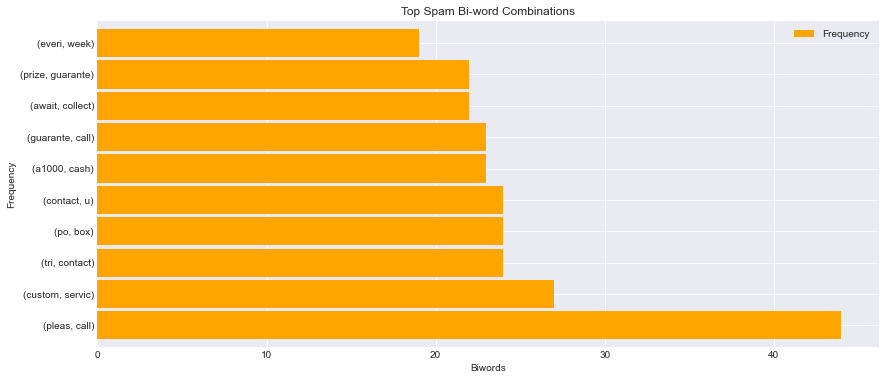

In [12]:
spam_biwords.head(10).plot.barh(color = 'orange', width = .9, figsize = (14, 6))

plt.title('Top Spam Bi-word Combinations')
plt.xlabel('Biwords')
plt.ylabel('Frequency')
plt.show();

In [27]:
spam_df.head()

,label,text,clean_text,bigrams
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,"[(free, entri), (entri, 2), (2, wkli), (wkli, ..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl ' 3 week ' word back ' like f...,"[(freemsg, hey), (hey, darl), (darl, '), (', 3..."
8,spam,WINNER!! As a valued network customer you have...,winner valu network custom select receivea a90...,"[(winner, valu), (valu, network), (network, cu..."
9,spam,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...,"[(mobil, 11), (11, month), (month, u), (u, r),..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",six chanc win cash 100 20000 pound txt csh11 s...,"[(six, chanc), (chanc, win), (win, cash), (cas..."


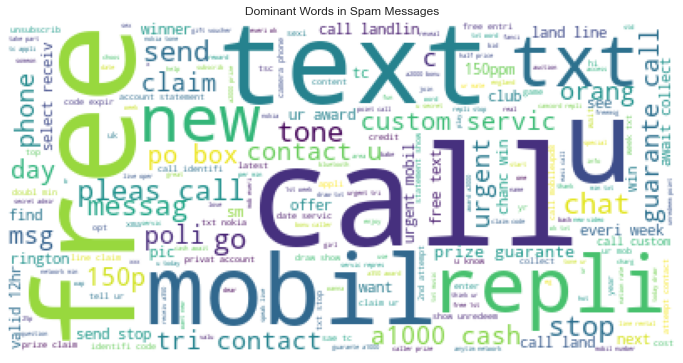

In [16]:
plt.figure(figsize = (12, 8))

img = WordCloud(background_color='white', random_state = 1178).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Dominant Words in Spam Messages')
plt.show();

In [47]:
ham_words = ' '.join(ham_df.clean_text)
ham_words

"go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah ' think goe usf live around though even brother like speak treat like aid patent per request ' mell mell oru minnaminungint nurungu vettam ' set callertun caller press 9 copi friend callertun ' gonna home soon ' want talk stuff anymor tonight k ' cri enough today ' search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh ki ' watch eh u rememb 2 spell name ye v naughti make v wet fine thatao way u feel thatao way gota b serious spell name ium go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice ' realli hungri tho suck mark get worri know ' sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom ' left dinner feel love ' back amp ' pack car ' let know ' room ahhh 

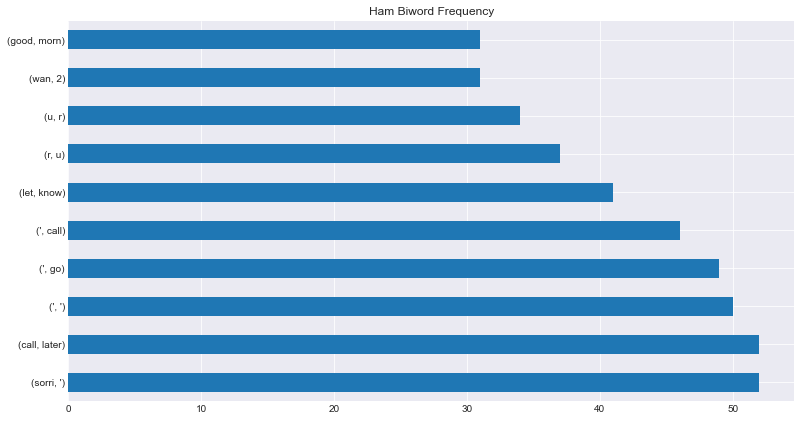

In [56]:
(pd.Series(nltk.bigrams(ham_words.split()))).value_counts().head(10).plot.barh()
plt.title('Ham Biword Frequency')
plt.show();

In [30]:
# adding ham bigrams to ham df
ham_bigrams = []

# for text_entry in ham_df.clean_text:
#     ham_bigrams.append(list(nltk.bigrams(text_entry.split())))
    
# ham_df['bigrams'] = ham_bigrams

ham_df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goe usf live around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent


In [16]:
ham_df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goe usf live around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent


In [32]:
# looking at ham data
ham_words = ' '.join(ham_df.clean_text)
ham_words

"go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah ' think goe usf live around though even brother like speak treat like aid patent per request ' mell mell oru minnaminungint nurungu vettam ' set callertun caller press 9 copi friend callertun ' gonna home soon ' want talk stuff anymor tonight k ' cri enough today ' search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh ki ' watch eh u rememb 2 spell name ye v naughti make v wet fine thatao way u feel thatao way gota b serious spell name ium go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice ' realli hungri tho suck mark get worri know ' sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom ' left dinner feel love ' back amp ' pack car ' let know ' room ahhh 

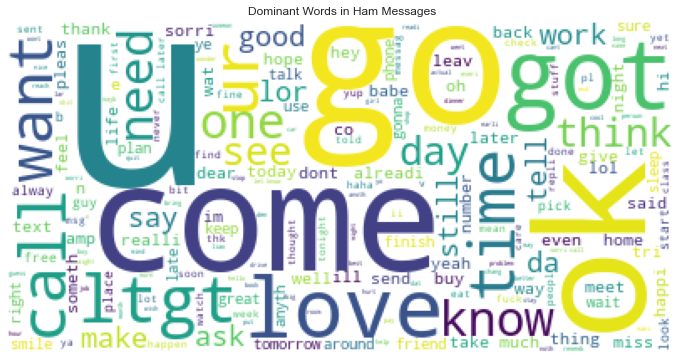

In [14]:
plt.figure(figsize = (12, 8))

img = WordCloud(background_color='white', random_state = 2121).generate(ham_words)
plt.imshow(img)
plt.axis('off')
plt.title('Dominant Words in Ham Messages')
plt.show();

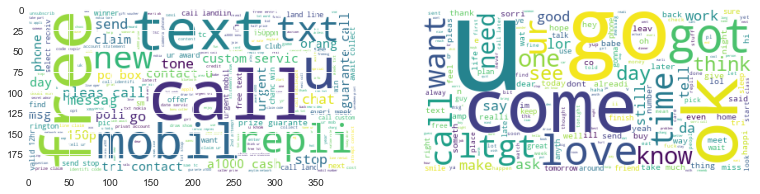

In [15]:
# the single words
fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.suptitle('Word Frequencies for Spam vs Not Spam')
ax1.imshow(WordCloud(background_color='white', random_state = 1178).generate(spam_words))
plt.axis('off')
# plt.title('Dominant Words in Spam Messages')

ax2.imshow(WordCloud(background_color='white', random_state = 2121).generate(ham_words))
plt.axis('off')
plt.show()
# plt.title('Dominant Words in Ham Messages')


## 2. Blog Articles
Explore the blog articles using the techniques discussed in the exploration lesson.

## 3. News Articles
Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.